## Decision Tree, Random Forest, Gradient Boosting, and XGBoost:

In this section, we do a statistical modelling of the data to predict the California House Price using Decision Tree, Random Forest, Gradient Boosting, and XGBoost.

In [74]:
import warnings
warnings.filterwarnings("ignore")
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np
from scipy import stats

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from xgboost import plot_importance
import xgboost as xgb
from xgboost import XGBRegressor
import os
import statistics


# pre-processing:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

# import libraries for model validation
from sklearn.model_selection import cross_val_score,train_test_split,validation_curve,learning_curve

# import libraries for metrics and reporting
from sklearn import metrics 
from sklearn.metrics import explained_variance_score
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score
import math
from scipy.stats import pearsonr
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix

In [124]:
data_prepared=pd.read_csv('data_prepared.csv',index_col=0)

In [125]:
data_prepared.head()

,longitude,housing_median_age,population,median_income,median_house_price,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
701,-1.198061,0.267020,-0.830491,1.151046,1.942445,0.838250,-1.012356,-0.681889,-0.015566,-0.353264,-0.384466
830,-1.208044,-1.560516,0.808456,0.408011,0.087910,-0.086579,-0.309506,-0.681889,-0.015566,-0.353264,-0.384466
859,-1.198061,-0.607019,0.659220,0.391588,0.353091,0.029978,-0.533384,-0.681889,-0.015566,-0.353264,-0.384466
860,-1.193070,-1.083767,0.310414,0.973025,0.664202,0.390584,-0.752754,-0.681889,-0.015566,-0.353264,-0.384466
861,-1.203053,-0.686477,0.577096,-0.098681,0.087043,-0.483893,0.610403,-0.681889,-0.015566,-0.353264,-0.384466


In [126]:
# extract further remaining data into numpy array:
X_out=data_prepared.drop(['median_house_price'],axis=1)
y_actual=data_prepared['median_house_price']

In [127]:
# Splitting data:
X_train,X_test,y_train,y_test=train_test_split(X_out,y_actual,test_size=0.20,random_state=101)

In [128]:
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (10588, 10) and size 105880
X_test shape (2648, 10) and size 26480
y_train shape (10588,) and size 10588
y_test shape (2648,) and size 2648


### Decision Tree:

In [7]:
dtr=DecisionTreeRegressor(random_state=42)

In [8]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [9]:
y_pred=dtr.predict(X_test)

In [10]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))

print("Mean absolute Error: %.2f"% metrics.mean_absolute_error(y_test, y_pred))

print("Root Mean square Error: %.2f"% np.sqrt(mean_squared_error(y_test, y_pred)))

print('Test Variance score: %.2f' % r2_score(y_test, y_pred))
print("Model Score for Training data: {}".format(dtr.score(X_train,y_train)))
print("Model Score for Testing data: {}".format(r2_score(y_test,y_pred)))
print('R2: ',np.sqrt(cross_val_score(dtr,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')).mean())

Mean squared error: 0.33
Mean absolute Error: 0.38
Root Mean square Error: 0.57
Test Variance score: 0.47
Model Score for Training data: 1.0
Model Score for Testing data: 0.4743618586115981
R2:  0.6719927803291259


Model score for training data is high as compared to the Model score for testing data, which implies that the above model 
is overfitted. RMSE is also high for the base decision tree model.

#### Determination of best parameters for Decison Tree Model:

In [11]:
def plot_validation_curve(scores,param_range,param_name,scoring='r2'):
    """This function plot validation curve.
    
    Parameters:
        scores: scores obtained from validation_curve() method
        param_range: list of range of parameters passed as 'param_range' in validation_curve() method
        scoring: str
    """
    n=len(param_range)
    if scoring=='r2':
        train_score=[scores[0][i].mean() for i in range (0,n)]
        test_score=[scores[1][i].mean() for i in range (0,n)]
    elif scoring=='neg_mean_squared_error':
        train_score=[np.sqrt(-scores[0][i].mean()) for i in range (0,n)]
        test_score=[np.sqrt(-scores[1][i].mean()) for i in range (0,n)]

    fig=plt.figure(figsize=(8,6))
    plt.plot(param_range,train_score,label='Train')
    plt.plot(param_range,test_score,label='Test')
    plt.xticks=param_range
    plt.title("Validation curve of {}".format(param_name),size=12)
    plt.legend()

####  max_depth:

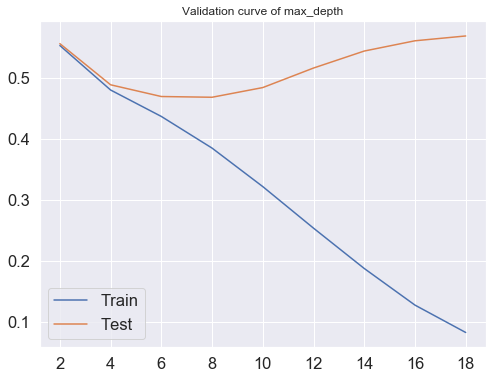

In [12]:
dtr=DecisionTreeRegressor(random_state=42)
param_name='max_depth'
param_range = range(2,20,2)
scoring='neg_mean_squared_error'
curve=validation_curve(dtr,X_train,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)

plot_validation_curve(curve,param_range,param_name,scoring)

From above validation curve, we can see that model starts overfitting after max_depth=6.
So, appropriate range of values for max_depth is 4 to 6.

####  max_features:

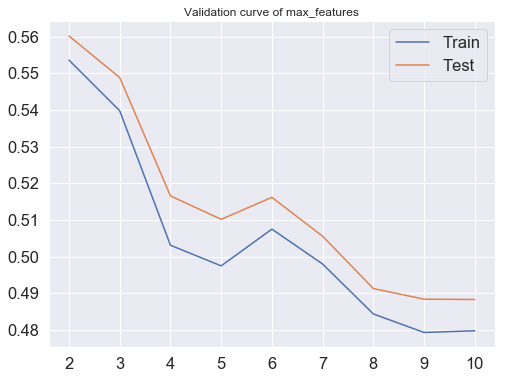

In [13]:
dtr=DecisionTreeRegressor(max_depth=4,random_state=42)
param_name='max_features'
param_range = range(2,11)
scoring='neg_mean_squared_error'
curve=validation_curve(dtr,X_train,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)
plot_validation_curve(curve,param_range,param_name,scoring)

Above validation curve shows that search for a split does not stop until at least one valid partition of the node samples
is found i.e. max_features: 8 to 10.

####  min_samples_split:

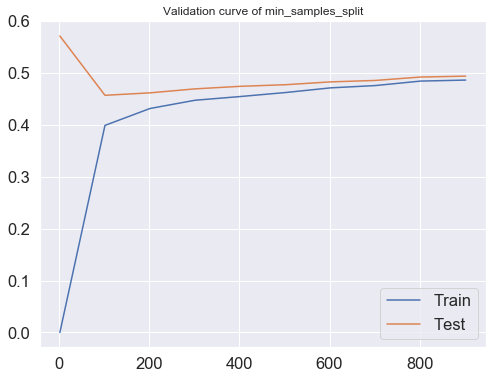

In [14]:
dtr=DecisionTreeRegressor(random_state=42)
param_name='min_samples_split'
param_range = range(2,1000,100)
scoring='neg_mean_squared_error'
curve=validation_curve(dtr,X_train,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)
plot_validation_curve(curve,param_range,param_name,scoring)

In above curve, minimum number of samples to split is 100, i.e. min_samples_split=100. Above 100, curve starts reducing 
variences.

#### min_samples_leaf:

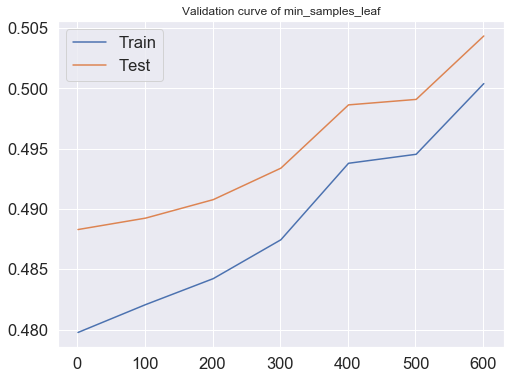

In [15]:
dtr=DecisionTreeRegressor(max_depth=4,random_state=42)
param_name='min_samples_leaf'
param_range = range(1,701,100)
scoring='neg_mean_squared_error'
curve=validation_curve(dtr,X_train,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)
plot_validation_curve(curve,param_range,param_name,scoring)

The minimum number of samples required to be at a leaf node is not seen clearly in the above validation curve.It means
it does not have any impact to reduce the overfitting.

#### n_estimators:

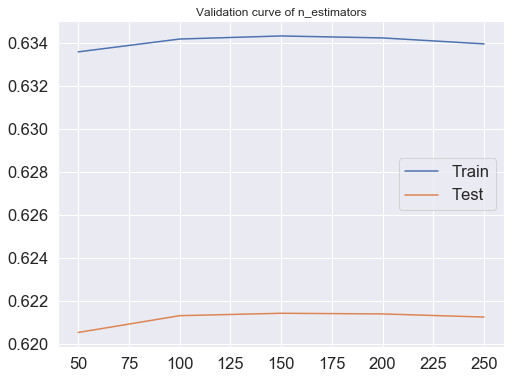

In [16]:
RFR=RandomForestRegressor(max_depth= 4, max_features=9, min_samples_split=100,random_state=42)
param_name='n_estimators'
param_range = range(50,251,50)
scoring='r2'
curve=validation_curve(RFR,X_train,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)
plot_validation_curve(curve,param_range,param_name,scoring)

Above 100, it starts overfitting; whereas below 100, it starts underfitting.
This means, n_estimators=100.

#### Random Forest:

#### Lets use the GridSearch method for the hyperparameters tuning-Optimization of algorithm( to select the more best parameters within the range that we obtained from above validation curves): 

In [17]:
RFR1 = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [100],
              'max_features': [7,8,9,10],
              'max_depth': [3,4,5,6],
              'min_samples_split':[100]
             }
scoring='r2'
grid_RFR = GridSearchCV(estimator=RFR1, param_grid=param_grid, scoring=scoring, n_jobs=1, cv=5,verbose=1)
grid_RFR.fit(X_train,y_train)
print('Random Forest regression...')
print('Best Params:')
print(grid_RFR.best_params_)  

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.8min finished


Random Forest regression...
Best Params:
{'max_depth': 6, 'max_features': 8, 'min_samples_split': 100, 'n_estimators': 100}


In [18]:
# Set best parameters given by GridsearchCV:
RFR_tuned=RandomForestRegressor(n_estimators=100,max_depth= 6, max_features=8, min_samples_split=100,random_state=42)

In [19]:
# Fitting train dataset with best hyperparameters:
RFR_tuned.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=100,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [20]:
y_predrfr_tuned=RFR_tuned.predict(X_test)

In [21]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predrfr_tuned))

print("Mean absolute Error: %.2f"% metrics.mean_absolute_error(y_test, y_predrfr_tuned))

print("Root Mean square Error: %.2f"% np.sqrt(mean_squared_error(y_test, y_predrfr_tuned)))

print('Test Variance score: %.2f' % r2_score(y_test, y_predrfr_tuned))
print("Model Score for Training data: {}".format(RFR_tuned.score(X_train,y_train)))
print("Model Score for Testing data: {}".format(r2_score(y_test,y_predrfr_tuned)))
print('R2(Cross_Val_Score): ',np.sqrt(cross_val_score(RFR_tuned,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')))
print('R2(mean of fold of cross_val_score): ',np.sqrt(cross_val_score(RFR_tuned,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')).mean())


Mean squared error: 0.21
Mean absolute Error: 0.32
Root Mean square Error: 0.45
Test Variance score: 0.67
Model Score for Training data: 0.6924669868848825
Model Score for Testing data: 0.6702965694860858
R2(Cross_Val_Score):  [0.8197375  0.81065043 0.81532919 0.81306304 0.82119932]
R2(mean of fold of cross_val_score):  0.8159958972387557


From above results, it is obviously clear that errors are less, model scores for training data and testing data are 
almost same and mean of CV score is also good. There is no overfitting seen here.

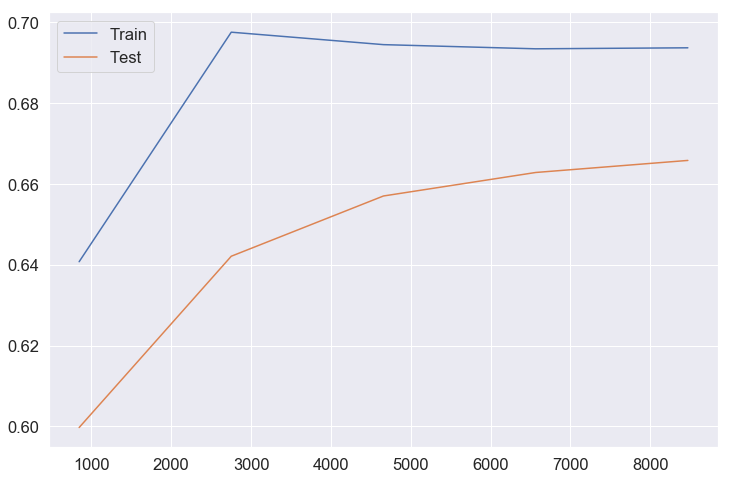

In [22]:
# Lets see the learning curve 
RFR_tuned=RandomForestRegressor(n_estimators=100,max_depth= 6, max_features=8, min_samples_split=100,random_state=42)
lc=learning_curve(RFR_tuned,X_train,y_train,cv=5,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score,label='Train')
plt.plot(size,test_score,label="Test")
plt.legend()

From above learning curve, it is clear that this model is not that much sufferering from overfitting. But, with the increase in number of samples, variance is decreasing.
So, this little overfitting problem can be solved by adding more training data.

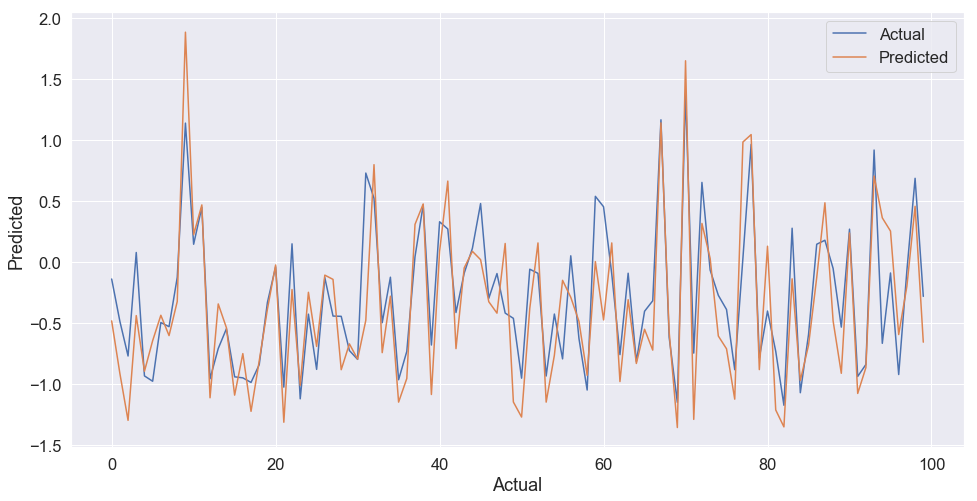

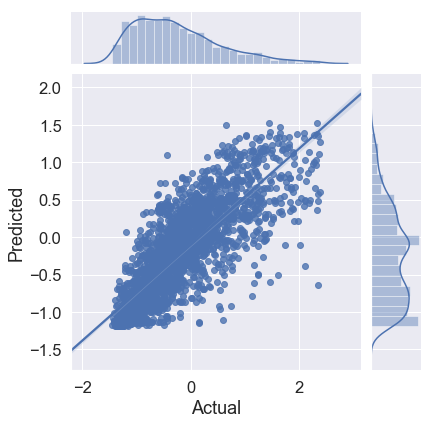

In [23]:
test = pd.DataFrame({'Predicted':y_predrfr_tuned,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

#### Gradient Boosting:

In [25]:
# Lets see the best parameters from ensemble method using GridSearch:
gbr=GradientBoostingRegressor(random_state=42)
param_grid={
    'n_estimators':[100,500],
    'max_depth':range(4,10,1),
    'max_features':[6,7,9,10],
    'min_samples_split':[100,200]  
}
scoring='r2'
grid_gbr=GridSearchCV(gbr,param_grid,scoring=scoring,n_jobs=2,cv=3,verbose=1)
grid_gbr.fit(X_train,y_train)
print(grid_gbr.best_params_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  8.7min
[Parallel(n_jobs=2)]: Done 288 out of 288 | elapsed: 16.1min finished


{'max_depth': 8, 'max_features': 6, 'min_samples_split': 100, 'n_estimators': 100}


In [91]:
# Set best parameters given by validation curves and GridsearchCV:
GBR_tuned=GradientBoostingRegressor(n_estimators=100,max_depth= 8,max_features=6, min_samples_split=100,learning_rate=0.1,subsample=0.75,random_state=42)

In [92]:
GBR_tuned.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=6, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=100,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=0.75, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [93]:
y_predgbr_tuned=GBR_tuned.predict(X_test)

In [95]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predgbr_tuned))

print("Mean absolute Error: %.2f"% metrics.mean_absolute_error(y_test, y_predgbr_tuned))

print("Root Mean square Error: %.2f"% np.sqrt(mean_squared_error(y_test, y_predgbr_tuned)))

print('Test Variance score: %.2f' % r2_score(y_test, y_predgbr_tuned))
print("Model Score for Training data: {}".format(GBR_tuned.score(X_train,y_train)))
print("Model Score for Testing data: {}".format(r2_score(y_test,y_predgbr_tuned)))
print('R2(Cross_Val_Score): ',np.sqrt(cross_val_score(GBR_tuned,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')))
print('R2(mean of fold of cross_val_score): ',np.sqrt(cross_val_score(GBR_tuned,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')).mean())


Mean squared error: 0.17
Mean absolute Error: 0.28
Root Mean square Error: 0.41
Test Variance score: 0.73
Model Score for Training data: 0.837686345696643
Model Score for Testing data: 0.725517294835595
R2(Cross_Val_Score):  [0.85017927 0.84813973 0.84384116 0.84755893 0.85094811]
R2(mean of fold of cross_val_score):  0.8481334412215423


This model is better than other models performed above.

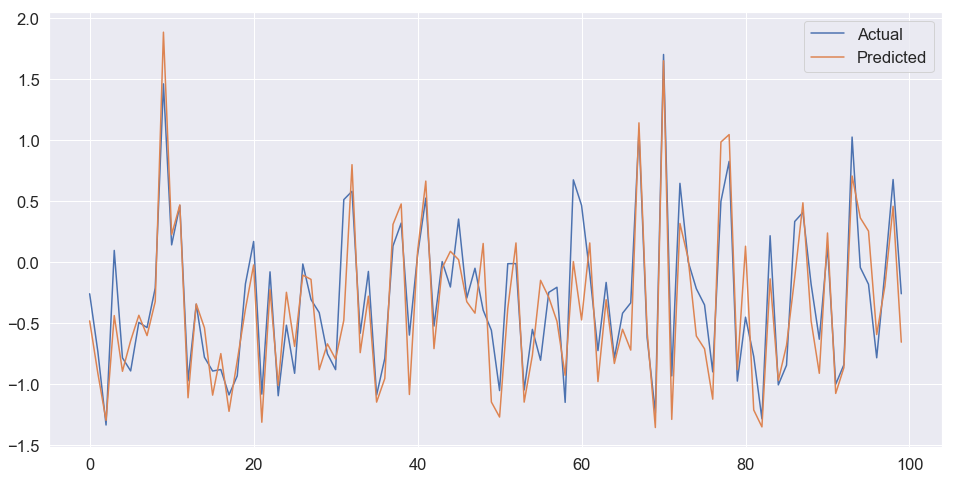

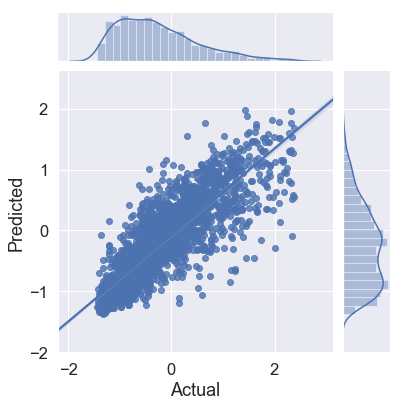

In [71]:
test = pd.DataFrame({'Predicted':y_predgbr_tuned,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [99]:
importances=list(GBR_tuned.feature_importances_)


In [100]:
importances

[0.16150966564034713,
 0.04776038129878147,
 0.03404152753879581,
 0.3741170918262968,
 0.05583683908796564,
 0.06617930058948966,
 0.2605551940183235,
 0.0,
 0.0,
 0.0]

In [102]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_out, importances)]
feature_importances

[('longitude', 0.16),
 ('housing_median_age', 0.05),
 ('population', 0.03),
 ('median_income', 0.37),
 ('ocean_prox_INLAND', 0.06),
 ('ocean_prox_ISLAND', 0.07),
 ('ocean_prox_NEAR OCEAN', 0.26),
 ('rooms_per_household', 0.0),
 ('bedrooms_per_room', 0.0),
 ('population_per_household', 0.0)]

In [103]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('median_income', 0.37),
 ('ocean_prox_NEAR OCEAN', 0.26),
 ('longitude', 0.16),
 ('ocean_prox_ISLAND', 0.07),
 ('ocean_prox_INLAND', 0.06),
 ('housing_median_age', 0.05),
 ('population', 0.03),
 ('rooms_per_household', 0.0),
 ('bedrooms_per_room', 0.0),
 ('population_per_household', 0.0)]

In [104]:
# plot the graph - feature importance wise
df_feature_importance = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
# df_feature_importance

In [106]:
df_feature_importance

,feature,importance
0,median_income,0.37
1,ocean_prox_NEAR OCEAN,0.26
2,longitude,0.16
3,ocean_prox_ISLAND,0.07
4,ocean_prox_INLAND,0.06
5,housing_median_age,0.05
6,population,0.03
7,rooms_per_household,0.00
8,bedrooms_per_room,0.00
9,population_per_household,0.00


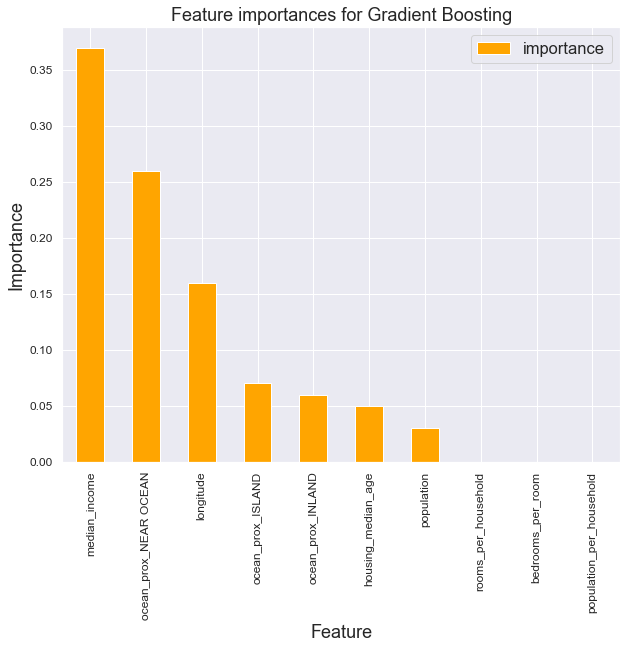

In [105]:
ax = df_feature_importance.plot(kind='bar', 
        x='feature', 
        y='importance',
        figsize=(10,8),
        title= 'Feature importances for Gradient Boosting',
        grid=True,
        legend=True,
        fontsize = 12,                        
        color='orange',    
       );
# Set the x-axis label
ax.set_xlabel("Feature")

# Set the y-axis label
ax.set_ylabel("Importance");

#### XGBoost:

In [30]:
# for tuning parameters
xgb = xgboost.XGBRegressor() 
parameters = {
'colsample_bytree':[0.4,0.6,0.8,1.0],
'gamma':[0,0.03,0.1,0.3],
'min_child_weight':[1.5,6,10],
'learning_rate':[0.1,0.07],
'max_depth':[4,5,6,7],
'n_estimators':[100],
'reg_alpha':[1e-5, 1e-2,  0.75],
'reg_lambda':[1e-5, 1e-2, 0.45],
'subsample':[0.6,0.95]  
}
grid_xgb = GridSearchCV(estimator = xgb, param_grid = parameters, n_jobs=2,iid=False, verbose=1,scoring='neg_mean_squared_error')
grid_xgb.fit(X_train,y_train)
print('best params')
print (grid_xgb.best_params_)
print('best score')
print (grid_xgb.best_score_)

Fitting 3 folds for each of 6912 candidates, totalling 20736 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   43.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  3.4min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  8.6min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 15.8min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed: 25.4min
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed: 35.4min
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed: 48.4min
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed: 64.0min
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed: 80.5min
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed: 98.9min
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed: 122.8min
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed: 150.5min
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed: 181.4min
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed: 217.7min
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed: 25

[16:21:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
best params
{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 10, 'n_estimators': 100, 'reg_alpha': 0.75, 'reg_lambda': 0.01, 'subsample': 0.95}
best score
-0.16401083287665333


In [143]:
# Using best parameters obtained from above hypertuning method(GridSearch method)
XGB_tuned = xgb.XGBRegressor(colsample_bytree=0.8,
                 gamma=0.1,                 
                 learning_rate=0.07,
                 max_depth=7,
                 min_child_weight=10,
                 n_estimators=100,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.01,
                 subsample=0.95,
                 random_state=42)
XGB_tuned.fit(X_train,y_train)

[20:32:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.1,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=7, min_child_weight=10, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0.75, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.95, verbosity=1)

In [144]:
XGB_tuned.fit(X_train,y_train)

[20:32:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.1,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=7, min_child_weight=10, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0.75, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.95, verbosity=1)

In [159]:
y_predxgb_tuned=XGB_tuned.fit(X_train,y_train)

[20:42:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [160]:
y_predxgb_tuned

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.1,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=7, min_child_weight=10, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0.75, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.95, verbosity=1)

In [161]:
XGB_tuned.score(X_test,y_test)

0.729116688486558

In [162]:
XGB_tuned.score(X_train,y_train)

0.8247652616459215

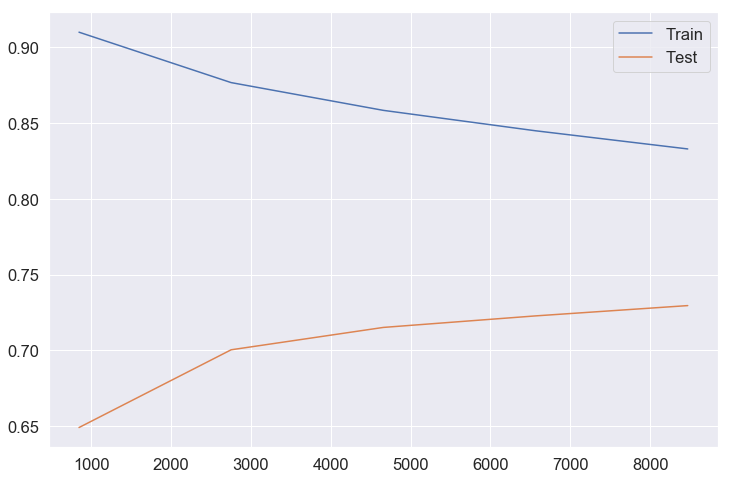

In [165]:
lc=learning_curve(XGB_tuned,X_train,y_train,cv=5,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score,label='Train')
plt.plot(size,test_score,label="Test")
plt.legend()

From above scores and learning curve, we see that this model is still suffering from overfitting. This can be solved by getting more training data.

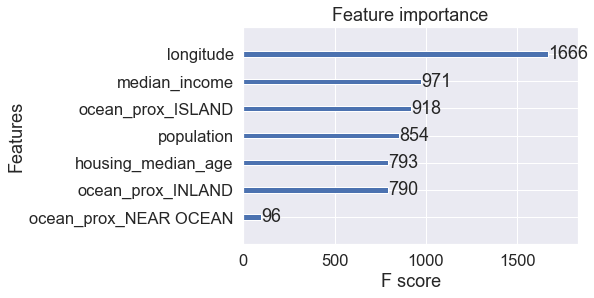

In [166]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance by XGB:
plot_importance(XGB_tuned)
plt.show()

In [167]:
# Feature importances list by XGBoost:
importances=list(XGB_tuned.feature_importances_)

In [168]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_out, importances)]
feature_importances

[('longitude', 0.02),
 ('housing_median_age', 0.01),
 ('population', 0.01),
 ('median_income', 0.08),
 ('ocean_prox_INLAND', 0.01),
 ('ocean_prox_ISLAND', 0.02),
 ('ocean_prox_NEAR OCEAN', 0.86),
 ('rooms_per_household', 0.0),
 ('bedrooms_per_room', 0.0),
 ('population_per_household', 0.0)]

In [169]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('ocean_prox_NEAR OCEAN', 0.86),
 ('median_income', 0.08),
 ('longitude', 0.02),
 ('ocean_prox_ISLAND', 0.02),
 ('housing_median_age', 0.01),
 ('population', 0.01),
 ('ocean_prox_INLAND', 0.01),
 ('rooms_per_household', 0.0),
 ('bedrooms_per_room', 0.0),
 ('population_per_household', 0.0)]

In [170]:
# plot the graph - feature importance wise
df_feature_importance = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
# df_feature_importance

In [171]:
df_feature_importance

,feature,importance
0,ocean_prox_NEAR OCEAN,0.86
1,median_income,0.08
2,longitude,0.02
3,ocean_prox_ISLAND,0.02
4,housing_median_age,0.01
5,population,0.01
6,ocean_prox_INLAND,0.01
7,rooms_per_household,0.00
8,bedrooms_per_room,0.00
9,population_per_household,0.00


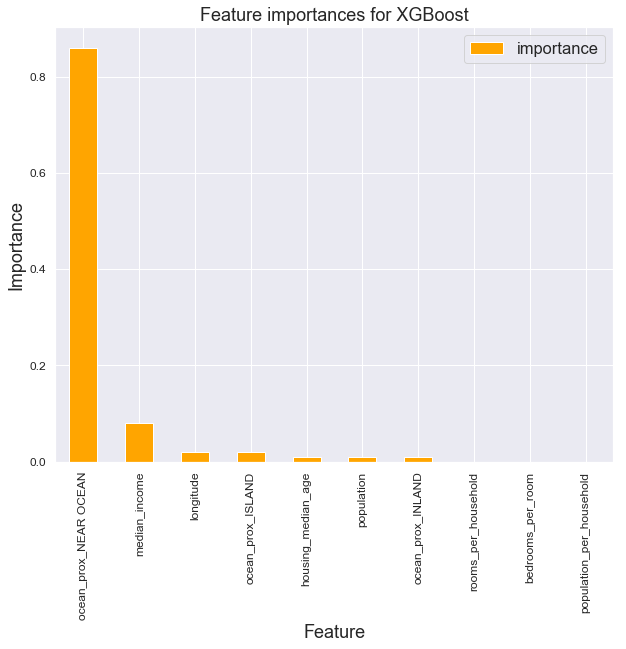

In [172]:
ax = df_feature_importance.plot(kind='bar', 
        x='feature', 
        y='importance',
        figsize=(10,8),
        title= 'Feature importances for XGBoost',
        grid=True,
        legend=True,
        fontsize = 12,                        
        color='orange',    
       );
# Set the x-axis label
ax.set_xlabel("Feature")

# Set the y-axis label
ax.set_ylabel("Importance");